<a href="https://colab.research.google.com/github/alegomezri/Aprendizaje-de-Maquina-avanzado/blob/main/APRENDIZAJE_DE_MAQUINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Avanzado de maquina / Andres Marino Alvarez Meza

# Yessica Alejandra Gomez Rivera


## Regresión Lineal


la regresión lineal simple son métodos estadísticos que estudian la relación lineal existente entre dos variables. 

$$y = wx + b$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf #Es una librería que puede utilizarse para crear modelos de Deep Learning directamente

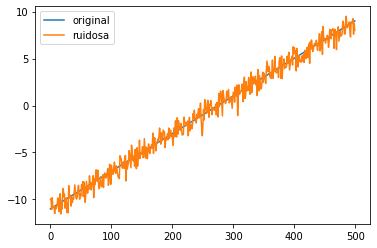

In [ ]:
N = 500 #numero de muestras 
x = np.linspace(-5,5,N) #vector de datos entre -5 y 5 
w1,w0 = 2,-1
Xdata = np.c_[x.reshape(-1,1),np.ones((N,1))] ##reshape: (-1,1) estoy pasando de dupla a vector 
w = np.array([w1,w0]).reshape(-1,1) #array: define una estructura de datos de secuencia
y = Xdata.dot(w) #mi señal original 
var = 0.5 
noise = np.sqrt(var)*np.random.randn(N) #insertando ruido 
yn = y + noise.reshape(-1,1) #mi señal original+ruido

plt.plot(y,label="original")
plt.plot(yn,label="ruidosa")
plt.legend()

In [ ]:
#ploteo la grafica de la señal original y la ruidosa.

### ENTRENAMIENTO BASE DE DATOS COMPLETA

Imposible para grandes cantidades de datos

[[ 2]
 [-1]] [[ 1.99925751]
 [-1.025704  ]]


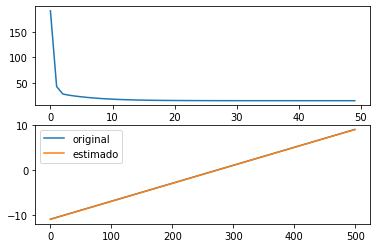

In [ ]:
#training 
epochs = 50 #epocas
lr = 1e-4
we = np.random.randn(2).reshape(-1,1) #reshape: estoy pasando de dupla a vector 
loss = np.zeros((epochs)) #loss: saca un vector de ceros, el numero de epocas.

for epoch in range(epochs):
  ye = (Xdata.dot(we)).reshape(-1,1)
  loss[epoch] = np.linalg.norm(yn-ye)
  grad = (2*Xdata.T).dot(ye-yn)
  we = we -lr*grad

plt.subplot(211)
plt.plot(np.arange(epochs),loss)
plt.subplot(212)
plt.plot(y,label="original")
plt.plot(ye,label="estimado")
plt.legend()
print(w,we)

In [ ]:
#plotea el entrenamiento respecto a la señal original y el estimado base de datos completa.

### Entrenamiento con iteraciones 

Para grandes cantidades de datos 

[[ 2]
 [-1]] [[ 1.99920972]
 [-1.02827548]]


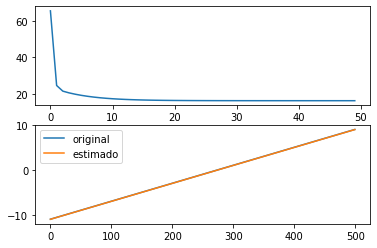

In [ ]:
#training 
epochs = 50
bath_size = 500 #bath cantidad de caracteristicas.
lr = 1e-4
we = np.random.randn(2).reshape(-1,1)
loss = np.zeros((epochs))
lamb = 1e-1 

iteraciones = int(len(Xdata)/bath_size)
for epoch in range(epochs):
  for i in range(1,iteraciones+1): 
    Xbath = Xdata[(i-1)*bath_size:i*bath_size,:]
    ynbath = yn[(i-1)*bath_size:i*bath_size]
    ye = (Xbath.dot(we)).reshape(-1,1)
    loss[epoch] = loss[epoch] + np.linalg.norm(ynbath-ye) + lamb*np.linalg.norm(we)
    grad = (2*Xbath.T).dot(ye-ynbath) + 2*lamb*we
    we = we - lr*grad

plt.subplot(211)
plt.plot(np.arange(epochs),loss)
plt.subplot(212)
plt.plot(y,label="original")
plt.plot(Xdata.dot(we),label="estimado")
plt.legend()
print(w,we)

In [ ]:
#ploteo la señal original y la estimada respecto al modelo con iteraciones.

# Modelo anterior usando la API de keras 

In [ ]:
#los  Keras los aplico con la finalidad de obtener informacion en un modelo y con esos datos entrenar la estructura de una red, cuando ingreso datos puede predecir.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(1)),
  tf.keras.layers.Dense(1,use_bias=True)
])

In [ ]:
model.compile(   #compilando el modelo para entrenarlo.
    loss='mse',
)

In [ ]:
model.fit(
    x=Xdata[:,0],y=yn,
    epochs=500,
    verbose=False,
)

In [ ]:
model.weights # weights: verifica el modelo que tengo. 

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9980974]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-1.0320874], dtype=float32)>]

# Kernels





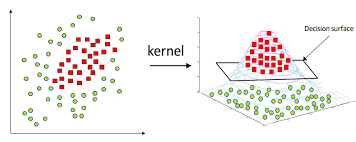

los kernels lo que hacen es ayudarle a dar separbilidad a mis datos , hay diferentes tipos de kernels,
unos son lineales y otros no lineales. (lineal: superficial, plano,linea,que separan los datos).
cuando mis datos tengan una alta variabilidad, los kernels  me pueden ayudar en la seleccion de esa variabilidad, pero son mas densos en su estructura de cálculo,
porque tienen en cuenta las caracteristicas(media, varianza, correlaciones) de los datos. puedo tener n caracteristicas de mis datos. 

In [ ]:
import tensorflow_probability as tfp

Data

In [ ]:
N = 500
X = np.linspace(-3*np.pi,3*np.pi,N) # linspace crea un vector de datos.
y = np.sinc(X/np.pi) #y: es una señal senoidal
var = 0.1
mue = 0
noise = mue + np.sqrt(var)*np.random.randn(Xdata.shape[0]) #estoy introduciendo ruido.
yn = y + noise #yn: mi señal mas ruido.
Xdata = X.reshape(-1,1) #reshape: (-1,1) estoy pasando de dupla a vector 

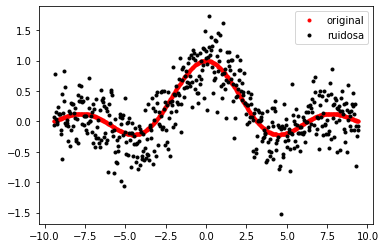

In [ ]:
plt.plot(X,y,'.r',label="original")
plt.plot(X,yn,'.k',label="ruidosa")
plt.legend()

In [ ]:
#grafica mi señal senoidal original y la señal senoidal+ruido.

In [ ]:
Kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(
    amplitude=None, length_scale=None, feature_ndims=1, validate_args=False,
    name='ExponentiatedQuadratic'
)
#estoy creando el kernel sin amplitud,sin escala, y con una sola caracteristica.

In [ ]:
number_centers = 50 #Numero de centroides: puntos de referencia en el modelo.
Xcen = np.arange(0,Xdata.shape[0],int(Xdata.shape[0]/number_centers)+1) #arange esta creando un rango entre los datos. 

In [ ]:
K = Kernel.matrix(Xdata,Xdata[Xcen]).numpy() # estoy haciendo el kernel, ingreando los datos y los datos respecto a ese numero de centroides.

In [ ]:
K.shape  #shape: las dimensiones de los datos.

(500, 46)

In [ ]:
Xdata = K

# **Kernels** 

$$y = \sum_{i=1}^{N} a_iK(x_i,X)$$

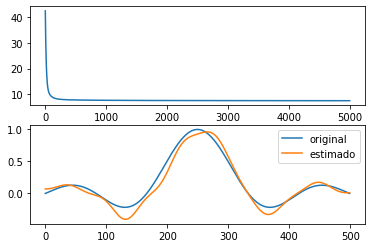

In [ ]:
#training 
epochs = 5000
bath_size = 500 #cantidad de caracteristicas (tamaño)
lr = 1e-4

we = np.random.randn(Xdata.shape[1]).reshape(-1,1)
loss = np.zeros((epochs)) #loss: saca un vector de 5000 ceros, el numero de epocas.
lamb = 1e-1 

iteraciones = int(len(Xdata)/bath_size) #las iteraciones son un vaor entero que son de la longitud de mis datos dividiendo el tamaño de las caracteristicas.
for epoch in range(epochs): #entra en un ciclo que va por cada una de las epocas que son 5000  
  for i in range(1,iteraciones+1): #dentro de cada una de esas epocas voy a hacer las iteraciones +1
    Xbath = Xdata[(i-1)*bath_size:i*bath_size,:] #creo los baths que van a ser respecto a mis datos, Xbath son mis 
    ynbath = yn[(i-1)*bath_size:i*bath_size].reshape(-1,1) #ybath son mis datos con ruido 
    ye = (Xbath.dot(we)).reshape(-1,1)
    loss[epoch] = loss[epoch] + np.linalg.norm(ynbath-ye) + lamb*np.linalg.norm(we) #loss es un vector de ceros, que guardo en cada una de mis epocas que retorna la norma vectorial entre mis datos con ruido, menos mis datos originales, mas un escalar por la norma vectorial de we (ramdom vectorial entre 0 y 1).
    grad = (2*Xbath.T).dot(ye-ynbath) + 2*lamb*we # ese valor de Loss es para tener en cuenta un coeficiente, despues de tener ese valor calculamos el gradiente de mis datos contra los datos con ruio mas dos por lamdaque es una cosntante, por we que es un ramdon.
    we = we - lr*grad #lo que hace we es ajustar el valor hasta obtener el estimado.

plt.subplot(211)
plt.plot(np.arange(epochs),loss)
plt.subplot(212)
plt.plot(y,label="original")
plt.plot(Xdata.dot(we),label="estimado")
plt.legend()

In [ ]:
we.shape

(46, 1)

In [ ]:
#la grafica azul es la original y la naranja es el estimado para obtener la recontruccion mas cercana a mi señal con Kernels.
#la parte de arriba se encuentra cuantas iteraciones se necesitaron para obtener una mejor configuracion o estimacion en la recontruccion de la señal.